<a href="https://colab.research.google.com/github/ianuhs/Pneumonia-Classifier/blob/main/train_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training and Improving a Pneumonia Classifier with PyTorch







This is a deep learning project that performs transfer learning by fine-tuning a pretrained ResNet model to detect pneumonia from chest X-ray images. It includes custom data loading, preprocessing, model training with metric tracking, and evaluation using validation and test accuracy. The project focuses on optimizing training performance, visualizing learning curves, and improving generalization through better data handling and monitoring.

# Terms and definitions:


ResNet-18:
*   18-layer deep convolutional neural network with residual connections, optimized for image classification

Epoch:
*   Definition: One complete pass through of the entire training dataset
*   Used to track learning progress over time
*   More epochs may improve learning, but be cautious of overfitting

Training Accuracy:
*   Definition: Percentage of correctly classified images on training dataset
*   Correct predictions / total training samples

Train Loss:
*   Definition: Error between predictions and true labels on training set
*   Loss function should decrease with training

Validation Loss:
*   Definition: Error on a separate validation set not used for training
*   Should also decrease and plateau near 0 alongside train loss

Validation Accuracy:
*   Definition: Percentage of correct classifications on validation set (Correct predictions / total validation samples)
*   Should increase and plateau as training progresses

Test Accuracy:
*   Definition: Percentage of correct classifications on unseen test set
*   Used for final evaluation after training

Precision:
*   Definition: Proportion of predicted positives that are true positives
*   Precision = TP / (TP+FP)
*   High precision means few false alarms

Recall:
*   Definition: Proportion of true positives that are correctly predicted
*   Recall = TP / (TP+FN)
*   High recall means few missed positives

F1 Score:
*   Definition: Harmonic mean of precision and recall
*   F1 = 2 x (Precision x Recall) / (Precision + Recall)
*   Balances precision and recall

Receiver Operating Characteristic - Area Under Curve (ROC AUC):
*   Definition: Measures ability to distinguish between classes (area under ROC curve)
*   ROC plots recall against False Positive Rate
*   Higher value suggests good discrimination ability between positive and negative cases

Confusion Matrix:
*   Definition: Matrix showing classifications [[ TN FP ] , [ FN TP ]]
*   Positive = Pneumonia
*   Negative = Normal

Overfitting:
*   Model memorizes training data, therefore, fails on new data resulting in low test performance



# Setup

In [ ]:
# Install packages
pip install torch torchvision pillow scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 96.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [3]:
# Unzip file with training data
!unzip -q /content/drive/MyDrive/data.zip -d /content/

# Model 1:
*   Epochs: 25

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 170MB/s]


Epoch 1/25, Train Loss: 0.1138, Train Acc: 0.9561
Validation Loss: 0.5527, Validation Accuracy: 0.7500
Epoch 2/25, Train Loss: 0.0571, Train Acc: 0.9781
Validation Loss: 0.3895, Validation Accuracy: 0.8125
Epoch 3/25, Train Loss: 0.0453, Train Acc: 0.9850
Validation Loss: 0.0755, Validation Accuracy: 0.9375
Epoch 4/25, Train Loss: 0.0318, Train Acc: 0.9883
Validation Loss: 0.0823, Validation Accuracy: 0.9375
Epoch 5/25, Train Loss: 0.0447, Train Acc: 0.9845
Validation Loss: 0.0492, Validation Accuracy: 1.0000
Epoch 6/25, Train Loss: 0.0267, Train Acc: 0.9910
Validation Loss: 0.0391, Validation Accuracy: 1.0000
Epoch 7/25, Train Loss: 0.0200, Train Acc: 0.9929
Validation Loss: 0.3342, Validation Accuracy: 0.7500
Epoch 8/25, Train Loss: 0.0102, Train Acc: 0.9967
Validation Loss: 0.1161, Validation Accuracy: 0.9375
Epoch 9/25, Train Loss: 0.0271, Train Acc: 0.9906
Validation Loss: 3.5408, Validation Accuracy: 0.5000
Epoch 10/25, Train Loss: 0.0247, Train Acc: 0.9904
Validation Loss: 0.158

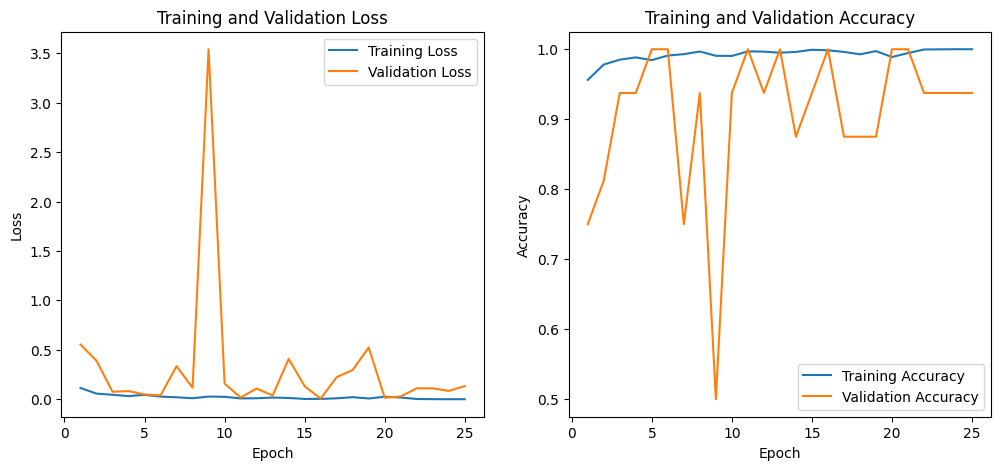

Test Accuracy: 0.7917
Precision: 0.7510
Recall: 0.9974
F1 Score: 0.8568
ROC AUC: 0.9251
Confusion Matrix:
[[105 129]
 [  1 389]]


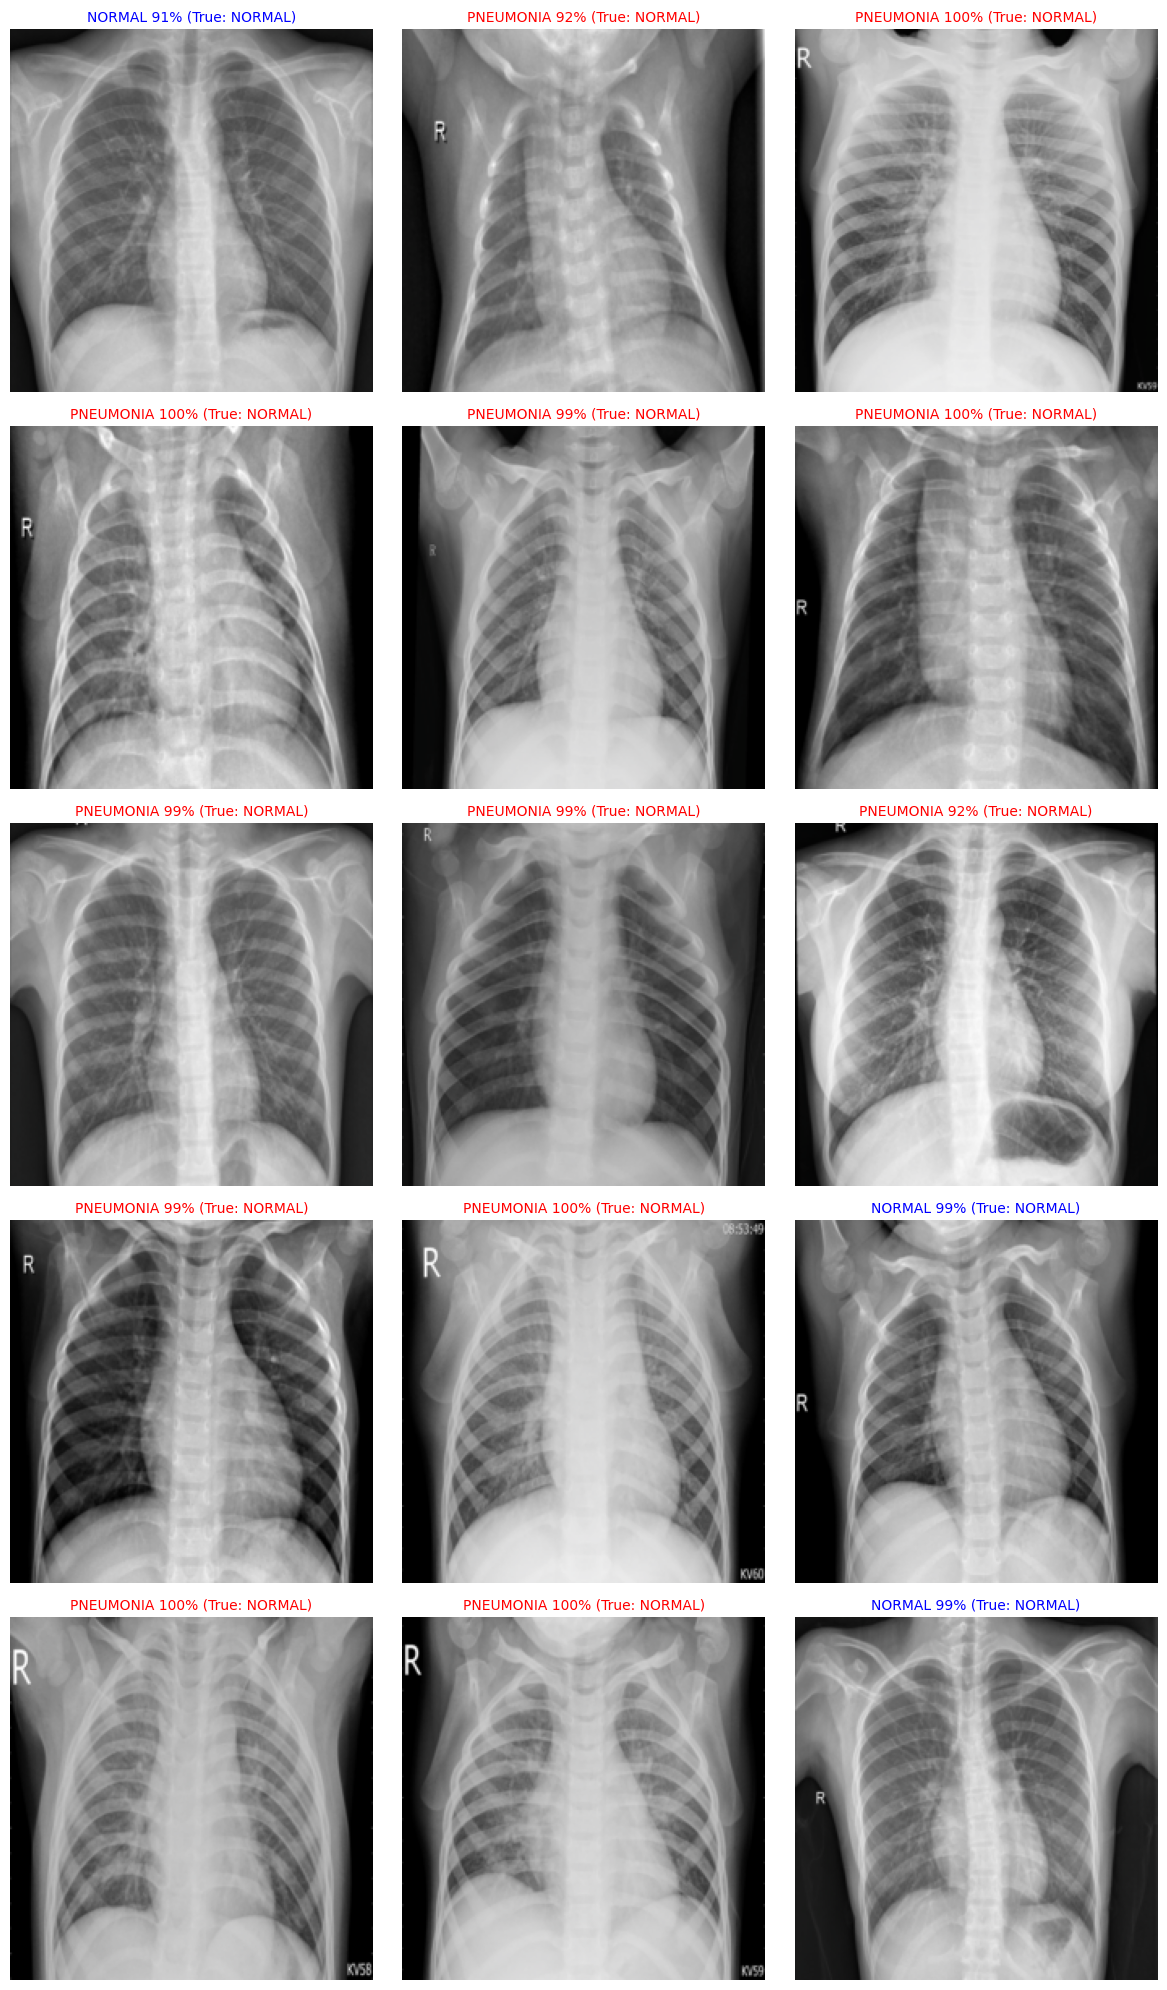

In [4]:
# Model 1

import os

from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models
from sklearn.metrics import accuracy_score

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


class PneumoniaDataset(Dataset):

  def __init__(self, root_dir, transform=None):

      self.root_dir = root_dir
      self.transform = transform
      self.image_paths = []
      self.labels = []

      for label in ['NORMAL', 'PNEUMONIA']:
        class_dir = os.path.join (root_dir, label)
        for img_name in os.listdir(class_dir):
            self.image_paths.append(os.path.join(class_dir, img_name))
            self.labels.append(0 if label == 'NORMAL' else 1)

  def __len__(self):
      return len(self.image_paths)

  def __getitem__(self, idx):
      img_path = self.image_paths[idx]
      image = Image.open(img_path).convert('RGB')
      label = self.labels[idx]

      if self.transform:
        image = self.transform(image)

      return image, label


transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225])
])

train_dataset = PneumoniaDataset(root_dir='/content/data/train', transform=transform)
val_dataset = PneumoniaDataset(root_dir='/content/data/val', transform=transform)
test_dataset = PneumoniaDataset(root_dir='/content/data/test', transform=transform)


num_workers = 2

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=num_workers)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=num_workers)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=num_workers)

model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
model.fc = nn.Linear(model.fc.in_features, 2) #NORMAL, PNEUMONIA
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_epoch = 25

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epoch):
  model.train()
  running_loss = 0.0
  running_corrects = 0
  total_train = 0

  for images, labels in train_loader:
    images = images.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item() * images.size(0)  # multiply by batch size
    _, preds = torch.max(outputs, 1)
    running_corrects += torch.sum(preds == labels).item()
    total_train += labels.size(0)

  epoch_loss = running_loss / total_train
  epoch_acc = running_corrects / total_train

  train_losses.append(epoch_loss)
  train_accuracies.append(epoch_acc)

  print(f"Epoch {epoch + 1}/{num_epoch}, Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f}")

  model.eval()
  val_labels = []
  val_preds = []
  val_loss = 0.0
  total_val = 0

  with torch.no_grad():
    for images, labels in val_loader:
      images = images.to(device)
      labels = labels.to(device)

      outputs = model(images)
      loss = criterion(outputs, labels)

      val_loss += loss.item() * images.size(0)
      _, prds = torch.max(outputs, 1)

      val_labels.extend(labels.cpu().numpy())
      val_preds.extend(prds.cpu().numpy())
      total_val += labels.size(0)

  val_epoch_loss = val_loss / total_val
  val_losses.append(val_epoch_loss)

  val_accuracy = accuracy_score(val_labels, val_preds)
  val_accuracies.append(val_accuracy)

  print(f'Validation Loss: {val_epoch_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

# plotting results

import matplotlib.pyplot as plt

epochs = range(1, num_epoch + 1)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

# test evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np

model.eval()
test_labels = []
test_preds = []
all_probs = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)[:, 1]  # Probability for PNEUMONIA class

        _, preds = torch.max(outputs, 1)

        test_labels.extend(labels.cpu().numpy())
        test_preds.extend(preds.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

test_accuracy = accuracy_score(test_labels, test_preds)
precision = precision_score(test_labels, test_preds)
recall = recall_score(test_labels, test_preds)
f1 = f1_score(test_labels, test_preds)
roc_auc = roc_auc_score(test_labels, all_probs)
cm = confusion_matrix(test_labels, test_preds)

print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print('Confusion Matrix:')
print(cm)

# Visualization of model predictions

import matplotlib.pyplot as plt
import torch.nn.functional as F

num_samples_to_show = 15

label_map = {0: 'NORMAL', 1: 'PNEUMONIA'}

# batch of test samples
model.eval()
shown = 0
fig, axs = plt.subplots(nrows=num_samples_to_show // 3, ncols=3, figsize=(12, 4 * (num_samples_to_show // 3)))
axs = axs.flatten()

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        probs = F.softmax(outputs, dim=1)

        preds = torch.argmax(probs, dim=1)

        for i in range(images.size(0)):
            if shown >= num_samples_to_show:
                break

            img = images[i].cpu().permute(1, 2, 0).numpy()
            img = img * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]  # unnormalize
            img = np.clip(img, 0, 1)

            pred_class = preds[i].item()
            pred_conf = probs[i][pred_class].item()
            true_class = labels[i].item()

            title_color = 'blue' if pred_class == true_class else 'red'
            prediction_str = f"{label_map[pred_class]} {int(pred_conf * 100)}% (True: {label_map[true_class]})"

            axs[shown].imshow(img, cmap='gray')
            axs[shown].axis('off')
            axs[shown].set_title(prediction_str, fontsize=10, color=title_color)

            shown += 1

        if shown >= num_samples_to_show:
            break

plt.tight_layout()
plt.show()

Model 1 Analysis:


*   High recall (99.74%) but 129 false positives lowers precision (75.10%)
*   Validation accuracy jumps down at epoch 9, but an increasing trend suggests that the model can generalize
*   perfect training accuracy but lower test accuracy (79.17%) and high validation loss spikes suggest overfitting








# Model 2:


*   Decrease number of epochs from 25 to 20 which may solve overfitting and pattern recognition issues

Epoch 1/20, Train Loss: 0.1241, Train Acc: 0.9507
Validation Loss: 0.5164, Validation Accuracy: 0.7500
Epoch 2/20, Train Loss: 0.0579, Train Acc: 0.9801
Validation Loss: 0.3773, Validation Accuracy: 0.8125
Epoch 3/20, Train Loss: 0.0549, Train Acc: 0.9785
Validation Loss: 0.0803, Validation Accuracy: 1.0000
Epoch 4/20, Train Loss: 0.0331, Train Acc: 0.9866
Validation Loss: 0.4003, Validation Accuracy: 0.8750
Epoch 5/20, Train Loss: 0.0312, Train Acc: 0.9885
Validation Loss: 0.0059, Validation Accuracy: 1.0000
Epoch 6/20, Train Loss: 0.0321, Train Acc: 0.9873
Validation Loss: 2.2823, Validation Accuracy: 0.6875
Epoch 7/20, Train Loss: 0.0189, Train Acc: 0.9933
Validation Loss: 0.0200, Validation Accuracy: 1.0000
Epoch 8/20, Train Loss: 0.0118, Train Acc: 0.9960
Validation Loss: 1.2822, Validation Accuracy: 0.6875
Epoch 9/20, Train Loss: 0.0119, Train Acc: 0.9965
Validation Loss: 0.5713, Validation Accuracy: 0.8750
Epoch 10/20, Train Loss: 0.0098, Train Acc: 0.9965
Validation Loss: 0.046

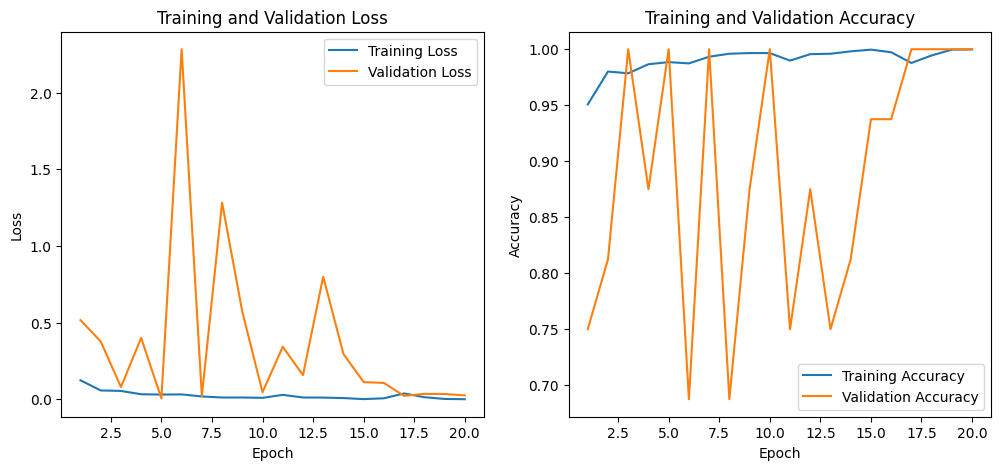

Test Accuracy: 0.7628
Precision: 0.7257
Recall: 0.9974
F1 Score: 0.8402
ROC AUC: 0.9245
Confusion Matrix:
[[ 87 147]
 [  1 389]]


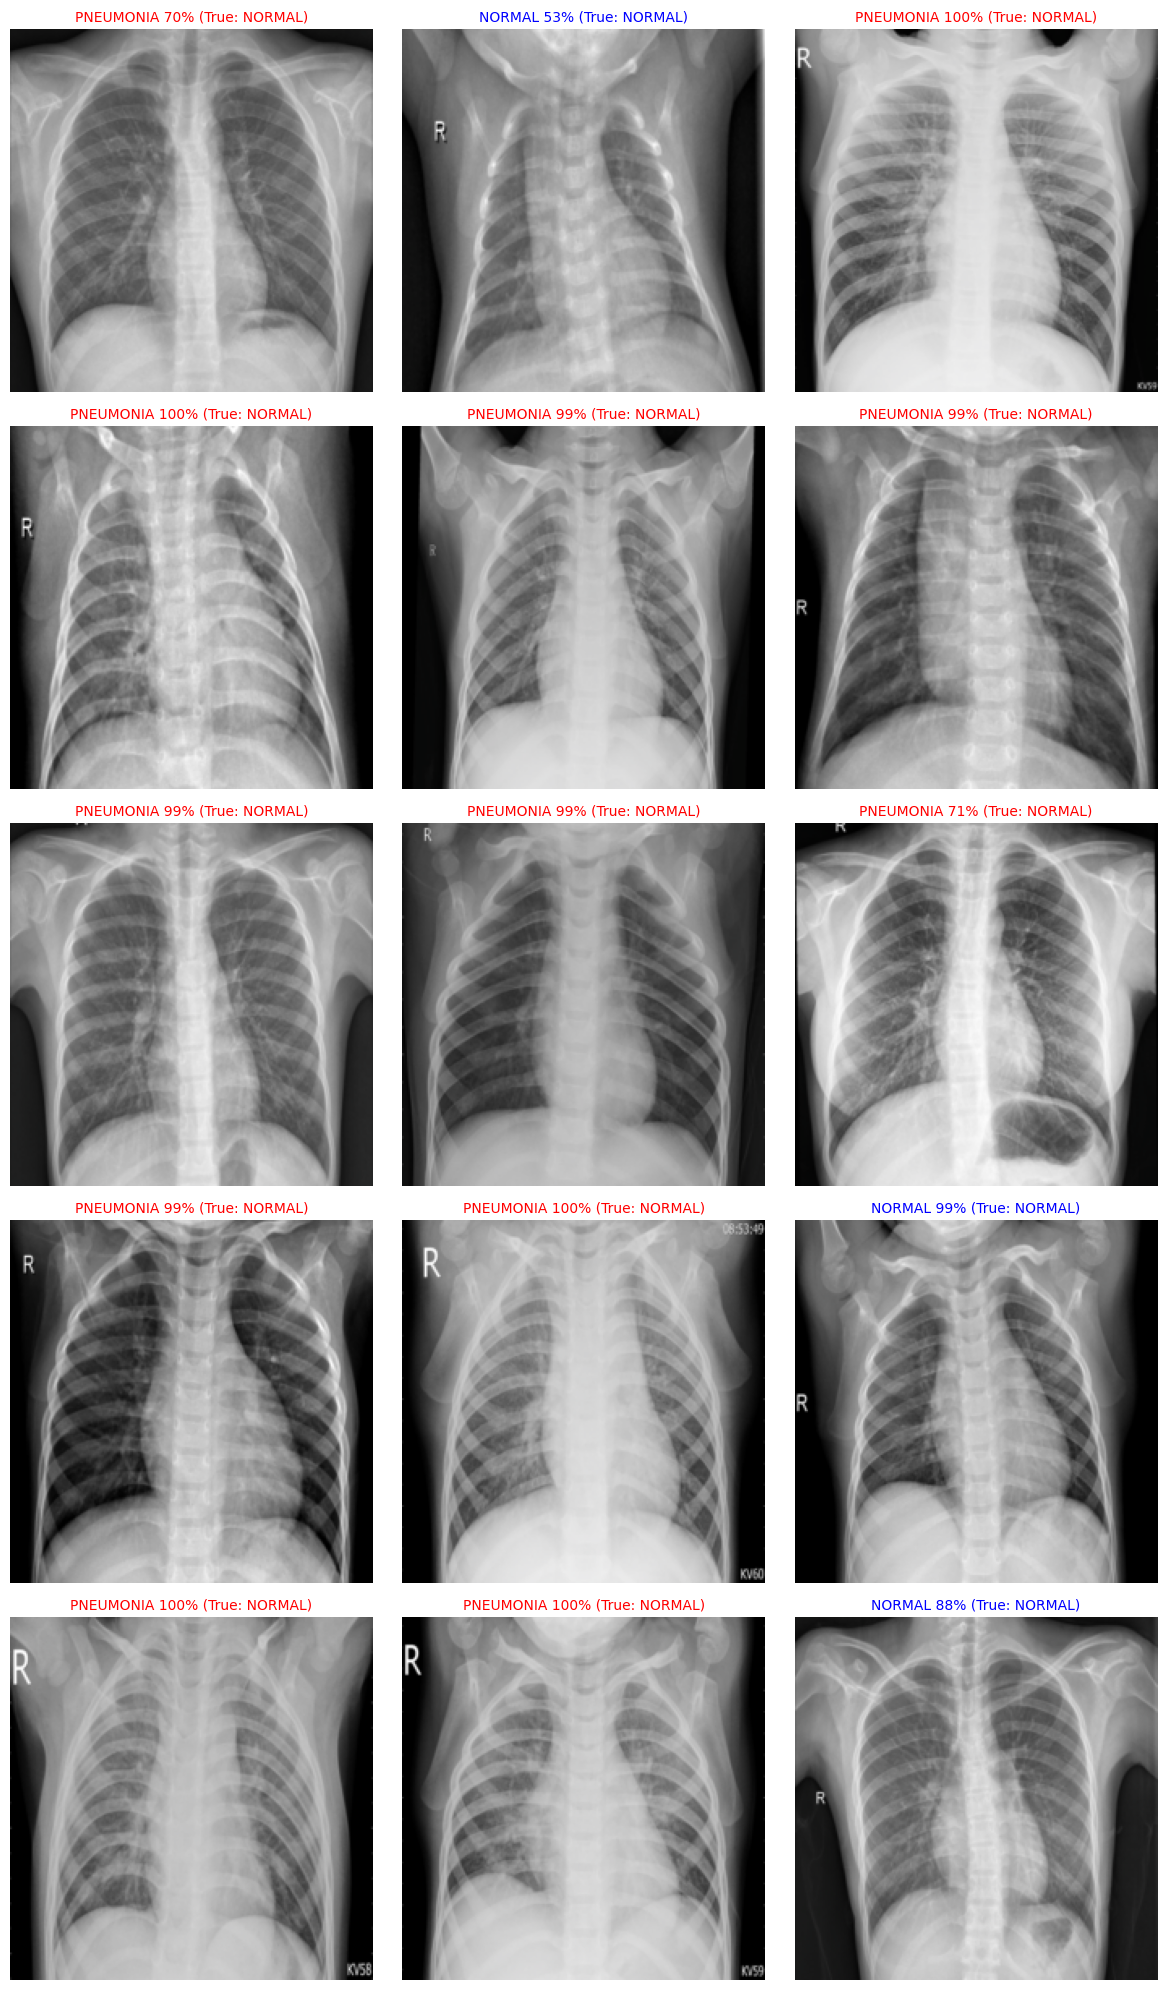

In [ ]:
# Model 2

import os

from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models
from sklearn.metrics import accuracy_score

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


class PneumoniaDataset(Dataset):

  def __init__(self, root_dir, transform=None):

      self.root_dir = root_dir
      self.transform = transform
      self.image_paths = []
      self.labels = []

      for label in ['NORMAL', 'PNEUMONIA']:
        class_dir = os.path.join (root_dir, label)
        for img_name in os.listdir(class_dir):
            self.image_paths.append(os.path.join(class_dir, img_name))
            self.labels.append(0 if label == 'NORMAL' else 1)

  def __len__(self):
      return len(self.image_paths)

  def __getitem__(self, idx):
      img_path = self.image_paths[idx]
      image = Image.open(img_path).convert('RGB')
      label = self.labels[idx]

      if self.transform:
        image = self.transform(image)

      return image, label


transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225])
])

train_dataset = PneumoniaDataset(root_dir='/content/data/train', transform=transform)
val_dataset = PneumoniaDataset(root_dir='/content/data/val', transform=transform)
test_dataset = PneumoniaDataset(root_dir='/content/data/test', transform=transform)


num_workers = 2

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=num_workers)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=num_workers)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=num_workers)

model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
model.fc = nn.Linear(model.fc.in_features, 2) #NORMAL, PNEUMONIA
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_epoch = 20

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epoch):
  model.train()
  running_loss = 0.0
  running_corrects = 0
  total_train = 0

  for images, labels in train_loader:
    images = images.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item() * images.size(0)  # multiply by batch size
    _, preds = torch.max(outputs, 1)
    running_corrects += torch.sum(preds == labels).item()
    total_train += labels.size(0)

  epoch_loss = running_loss / total_train
  epoch_acc = running_corrects / total_train

  train_losses.append(epoch_loss)
  train_accuracies.append(epoch_acc)

  print(f"Epoch {epoch + 1}/{num_epoch}, Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f}")

  model.eval()
  val_labels = []
  val_preds = []
  val_loss = 0.0
  total_val = 0

  with torch.no_grad():
    for images, labels in val_loader:
      images = images.to(device)
      labels = labels.to(device)

      outputs = model(images)
      loss = criterion(outputs, labels)

      val_loss += loss.item() * images.size(0)
      _, prds = torch.max(outputs, 1)

      val_labels.extend(labels.cpu().numpy())
      val_preds.extend(prds.cpu().numpy())
      total_val += labels.size(0)

  val_epoch_loss = val_loss / total_val
  val_losses.append(val_epoch_loss)

  val_accuracy = accuracy_score(val_labels, val_preds)
  val_accuracies.append(val_accuracy)

  print(f'Validation Loss: {val_epoch_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

# plotting results

import matplotlib.pyplot as plt

epochs = range(1, num_epoch + 1)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

# test evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np

model.eval()
test_labels = []
test_preds = []
all_probs = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)[:, 1]  # Probability for PNEUMONIA class

        _, preds = torch.max(outputs, 1)

        test_labels.extend(labels.cpu().numpy())
        test_preds.extend(preds.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

test_accuracy = accuracy_score(test_labels, test_preds)
precision = precision_score(test_labels, test_preds)
recall = recall_score(test_labels, test_preds)
f1 = f1_score(test_labels, test_preds)
roc_auc = roc_auc_score(test_labels, all_probs)
cm = confusion_matrix(test_labels, test_preds)

print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print('Confusion Matrix:')
print(cm)

# Visualization of model predictions

import matplotlib.pyplot as plt
import torch.nn.functional as F

num_samples_to_show = 15

label_map = {0: 'NORMAL', 1: 'PNEUMONIA'}

# batch of test samples
model.eval()
shown = 0
fig, axs = plt.subplots(nrows=num_samples_to_show // 3, ncols=3, figsize=(12, 4 * (num_samples_to_show // 3)))
axs = axs.flatten()

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        probs = F.softmax(outputs, dim=1)

        preds = torch.argmax(probs, dim=1)

        for i in range(images.size(0)):
            if shown >= num_samples_to_show:
                break

            img = images[i].cpu().permute(1, 2, 0).numpy()
            img = img * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]  # unnormalize
            img = np.clip(img, 0, 1)

            pred_class = preds[i].item()
            pred_conf = probs[i][pred_class].item()
            true_class = labels[i].item()

            title_color = 'blue' if pred_class == true_class else 'red'
            prediction_str = f"{label_map[pred_class]} {int(pred_conf * 100)}% (True: {label_map[true_class]})"

            axs[shown].imshow(img, cmap='gray')
            axs[shown].axis('off')
            axs[shown].set_title(prediction_str, fontsize=10, color=title_color)

            shown += 1

        if shown >= num_samples_to_show:
            break

plt.tight_layout()
plt.show()

Model 2 Analysis:



*   Near perfect train accuracy (99.98%) while test accuracy is much lower (76.28%) suggests overfitting. Model performs well on training data but not on new test data. This disconnect suggests the model has memorized training examples rather than learning patterns
*   High recall (99.74%): Model is very sensitive to pneumonia trends, as it classifies almost all pneumonia cases (389/399), but at the cost of many false positives (147)
*   Unstable validation loss may be caused by recognition of patterns that are not important
*   Decreasing the number of epochs from 25 to 20 shows no improvement:
 *   Test accuracy from 79.17% (Model 1) to 76.28% (Model 2)
 *   Precision from 75.10% (Model 1) to 72.57% (Model 2)
 *   F1 Score from 85.68% (Model 1) to 84.02% (Model 2)

















# Model 3:

*   Epochs: 20
*   Introduce data augmentation to combat overfitting, high recall, and unstable validation, hoping that the model will recognize patterns that actually matter and also not just memorize training data



Epoch 1/20, Train Loss: 0.1582, Train Acc: 0.9387
Validation Loss: 0.1641, Validation Accuracy: 0.9375
Epoch 2/20, Train Loss: 0.1015, Train Acc: 0.9620
Validation Loss: 0.8476, Validation Accuracy: 0.7500
Epoch 3/20, Train Loss: 0.0792, Train Acc: 0.9693
Validation Loss: 0.3734, Validation Accuracy: 0.8750
Epoch 4/20, Train Loss: 0.0717, Train Acc: 0.9728
Validation Loss: 0.3308, Validation Accuracy: 0.8125
Epoch 5/20, Train Loss: 0.0715, Train Acc: 0.9745
Validation Loss: 0.5518, Validation Accuracy: 0.6250
Epoch 6/20, Train Loss: 0.0611, Train Acc: 0.9787
Validation Loss: 0.8762, Validation Accuracy: 0.5625
Epoch 7/20, Train Loss: 0.0591, Train Acc: 0.9795
Validation Loss: 0.1726, Validation Accuracy: 0.9375
Epoch 8/20, Train Loss: 0.0599, Train Acc: 0.9768
Validation Loss: 0.6994, Validation Accuracy: 0.5625
Epoch 9/20, Train Loss: 0.0450, Train Acc: 0.9829
Validation Loss: 1.9421, Validation Accuracy: 0.6250
Epoch 10/20, Train Loss: 0.0436, Train Acc: 0.9833
Validation Loss: 0.669

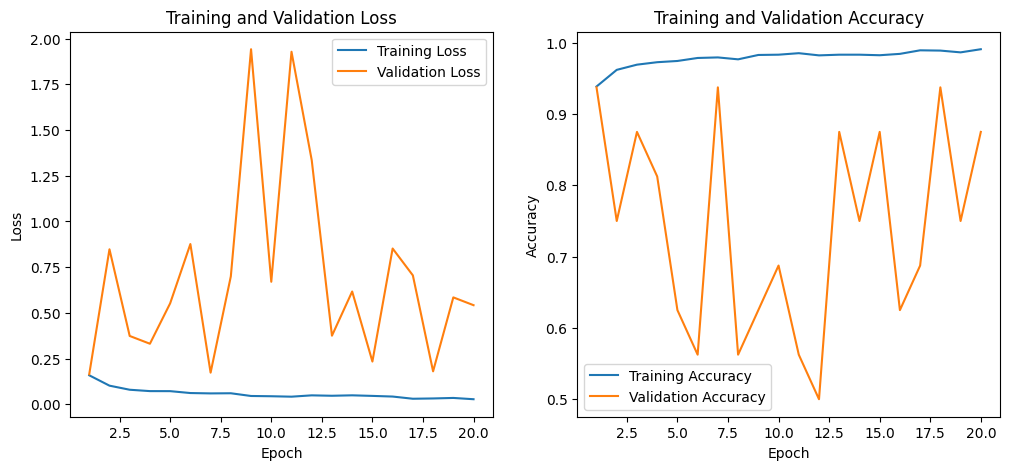

Test Accuracy: 0.8077
Precision: 0.7647
Recall: 1.0000
F1 Score: 0.8667
ROC AUC: 0.9645
Confusion Matrix:
[[114 120]
 [  0 390]]


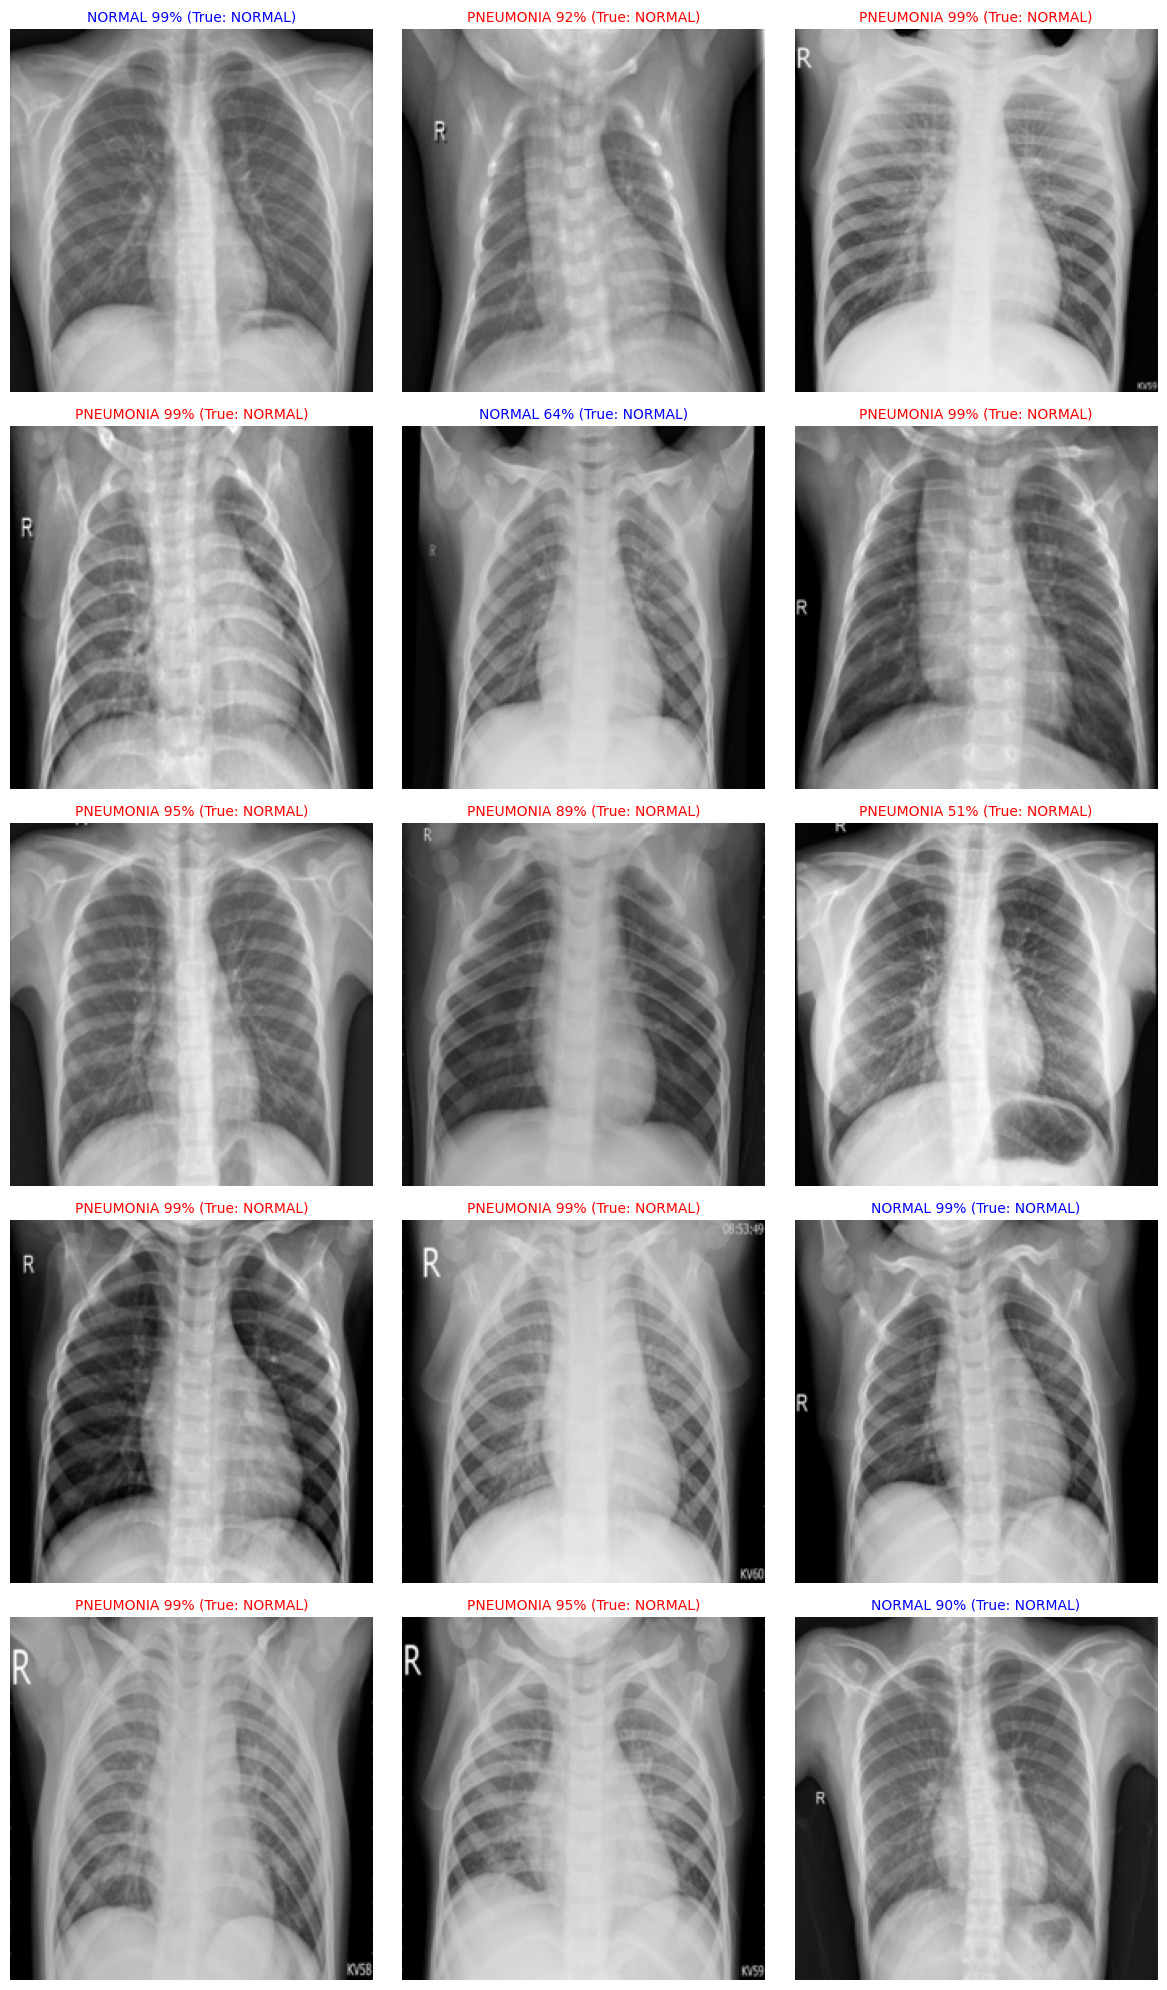

In [ ]:
# Model 3

import os

from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models
from sklearn.metrics import accuracy_score

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


class PneumoniaDataset(Dataset):

  def __init__(self, root_dir, transform=None):

      self.root_dir = root_dir
      self.transform = transform
      self.image_paths = []
      self.labels = []

      for label in ['NORMAL', 'PNEUMONIA']:
        class_dir = os.path.join (root_dir, label)
        for img_name in os.listdir(class_dir):
            self.image_paths.append(os.path.join(class_dir, img_name))
            self.labels.append(0 if label == 'NORMAL' else 1)

  def __len__(self):
      return len(self.image_paths)

  def __getitem__(self, idx):
      img_path = self.image_paths[idx]
      image = Image.open(img_path).convert('RGB')
      label = self.labels[idx]

      if self.transform:
        image = self.transform(image)

      return image, label


# Data augmentation transforms
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(), # Flip image horizontally with 50% chance
    transforms.RandomRotation(10), # Random rotate ±10 degrees
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.05),  # Random color changes
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225])
])

# Validation and test transform: only resize and normalize (no augmentation)
val_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225])
])


train_dataset = PneumoniaDataset(root_dir='/content/data/train', transform=train_transform)
val_dataset = PneumoniaDataset(root_dir='/content/data/val', transform=val_test_transform)
test_dataset = PneumoniaDataset(root_dir='/content/data/test', transform=val_test_transform)


num_workers = 2

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=num_workers)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=num_workers)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=num_workers)

model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
model.fc = nn.Linear(model.fc.in_features, 2) #NORMAL, PNEUMONIA
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_epoch = 20

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epoch):
  model.train()
  running_loss = 0.0
  running_corrects = 0
  total_train = 0

  for images, labels in train_loader:
    images = images.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item() * images.size(0)  # multiply by batch size
    _, preds = torch.max(outputs, 1)
    running_corrects += torch.sum(preds == labels).item()
    total_train += labels.size(0)

  epoch_loss = running_loss / total_train
  epoch_acc = running_corrects / total_train

  train_losses.append(epoch_loss)
  train_accuracies.append(epoch_acc)

  print(f"Epoch {epoch + 1}/{num_epoch}, Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f}")

  model.eval()
  val_labels = []
  val_preds = []
  val_loss = 0.0
  total_val = 0

  with torch.no_grad():
    for images, labels in val_loader:
      images = images.to(device)
      labels = labels.to(device)

      outputs = model(images)
      loss = criterion(outputs, labels)

      val_loss += loss.item() * images.size(0)
      _, prds = torch.max(outputs, 1)

      val_labels.extend(labels.cpu().numpy())
      val_preds.extend(prds.cpu().numpy())
      total_val += labels.size(0)

  val_epoch_loss = val_loss / total_val
  val_losses.append(val_epoch_loss)

  val_accuracy = accuracy_score(val_labels, val_preds)
  val_accuracies.append(val_accuracy)

  print(f'Validation Loss: {val_epoch_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

# plotting results

import matplotlib.pyplot as plt

epochs = range(1, num_epoch + 1)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

# test evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np

model.eval()
test_labels = []
test_preds = []
all_probs = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)[:, 1]  # Probability for PNEUMONIA class

        _, preds = torch.max(outputs, 1)

        test_labels.extend(labels.cpu().numpy())
        test_preds.extend(preds.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

test_accuracy = accuracy_score(test_labels, test_preds)
precision = precision_score(test_labels, test_preds)
recall = recall_score(test_labels, test_preds)
f1 = f1_score(test_labels, test_preds)
roc_auc = roc_auc_score(test_labels, all_probs)
cm = confusion_matrix(test_labels, test_preds)

print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print('Confusion Matrix:')
print(cm)

# Visualization of model predictions

import matplotlib.pyplot as plt
import torch.nn.functional as F

num_samples_to_show = 15

label_map = {0: 'NORMAL', 1: 'PNEUMONIA'}

# batch of test samples
model.eval()
shown = 0
fig, axs = plt.subplots(nrows=num_samples_to_show // 3, ncols=3, figsize=(12, 4 * (num_samples_to_show // 3)))
axs = axs.flatten()

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        probs = F.softmax(outputs, dim=1)

        preds = torch.argmax(probs, dim=1)

        for i in range(images.size(0)):
            if shown >= num_samples_to_show:
                break

            img = images[i].cpu().permute(1, 2, 0).numpy()
            img = img * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]  # unnormalize
            img = np.clip(img, 0, 1)

            pred_class = preds[i].item()
            pred_conf = probs[i][pred_class].item()
            true_class = labels[i].item()

            title_color = 'blue' if pred_class == true_class else 'red'
            prediction_str = f"{label_map[pred_class]} {int(pred_conf * 100)}% (True: {label_map[true_class]})"

            axs[shown].imshow(img, cmap='gray')
            axs[shown].axis('off')
            axs[shown].set_title(prediction_str, fontsize=10, color=title_color)

            shown += 1

        if shown >= num_samples_to_show:
            break

plt.tight_layout()
plt.show()

Model 3 Analysis:


*   Perfect recall as all 100% of actual pneumonia cases were detected, but 120 false positives
*   Data augmentation shows improvement in all metrics
 *   Test Accuracy: 76.28% (Model 2) to 80.77% (Model 3)
 *   Precision: 72.57% (Model 2) to 76.47% (Model 3)
 *   F1 Score: 84.02% (Model 2) to 86.67% (Model 3)
 *   Least number of false positives (120 from 140)







# Model 4:



*   Increase number of epochs to 30
*   Use ResNet-34 rather than 18





NEXT STEPS:
- model 4: increase epochs
- consider increasing depth of resnet, perhaps to 34 or 50

